In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load dataset
url = 'https://raw.githubusercontent.com/pararawendy/dibimbing-materials/main/boston.csv'
boston_house = pd.read_csv(url)
boston_house.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Data Cleaning

In [ ]:
#check missing data
boston_house.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

No missing value

In [ ]:
#check duplicated value
boston_house.duplicated().sum()

0

No duplicated data, so we're good

## Quick EDA

In [ ]:
boston_house.shape

(506, 14)

In [ ]:
#checking data summary
boston_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Observation:

1. Data types all number (int and float), no object
2. If necessary, we might change the types of dataframe in the future

In [ ]:
#check statistical summary of dataframe
print(boston_house.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

## Create Machine Learning Model

### Split Data

In [ ]:
#split train test
from sklearn.model_selection import train_test_split

feature = boston_house.drop(columns='medv')
target = boston_house[['medv']]

ftr_train, ftr_test, tgt_train, tgt_test = train_test_split(feature,
                                                            target,
                                                            test_size=0.20, 
                                                            random_state=42)

### Check VIF scores and do feature selection

In [ ]:
#calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(ftr_train)

vif_df = pd.DataFrame([vif(X.values, i)
              for i in range(X.shape[1])],
              index=X.columns).reset_index()

vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316
10,tax,8.943301


There are several features with high VIF scores:
1. `nox`
2. `dis`
3. `rad`
4. `tax`

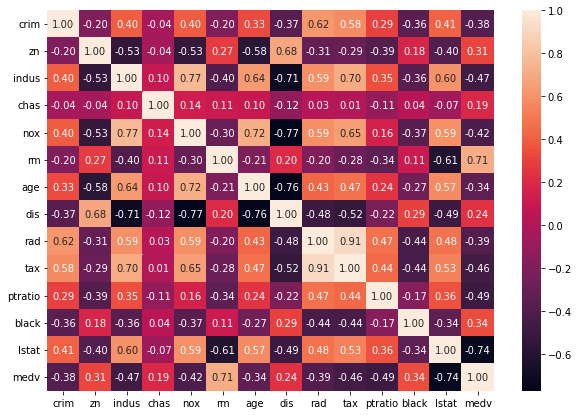

In [ ]:
#heatmap correlation
boston_train = pd.concat([ftr_train, tgt_train], axis=1)
corr = boston_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

After looking to the corr heatmap, I choose to retain `tax` and drop:

*   `nox`
*   `dis`
*   `rad`






In [ ]:
#drop redundant features
ftr_train = ftr_train.drop(columns=['nox', 'dis', 'rad'])
ftr_test = ftr_test.drop(columns=['nox', 'dis', 'rad'])

In [ ]:
#recheck VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(ftr_train)

vif_df = pd.DataFrame([vif(X.values, i)
              for i in range(X.shape[1])],
              index=X.columns).reset_index()

vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.576797
2,zn,1.862308
3,indus,3.175204
4,chas,1.072548
5,rm,1.855735
6,age,2.341920
7,tax,2.958826
8,ptratio,1.502214
9,black,1.313018
10,lstat,2.761524


All Good!

### Model Training

#### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

#train the model
X_boston_train = ftr_train.to_numpy()
y_boston_train = tgt_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

#define the model
ridge_reg = Ridge(alpha=0.1,
                  random_state=42)

ridge_reg.fit(X_boston_train, y_boston_train)

Ridge(alpha=0.1, random_state=42)

In [ ]:
#retrieve the coefficients
#show as a nice df

data = ftr_train
model = ridge_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient': [model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,6.795462
1,crim,-0.058799
2,zn,-0.014025
3,indus,0.018389
4,chas,3.039253
5,rm,5.098972
6,age,0.010021
7,tax,-0.000189
8,ptratio,-0.807435
9,black,0.012382


#### Lasso

In [ ]:
from sklearn.linear_model import Lasso

#define the model
lasso_reg = Lasso(alpha=0.1,
                  random_state=42)
lasso_reg.fit(X_boston_train, y_boston_train)

Lasso(alpha=0.1, random_state=42)

In [ ]:
#retrieve the coefficients
#show as a nice df

data = ftr_train
model = lasso_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,8.862387
1,crim,-0.059013
2,zn,-0.012827
3,indus,0.017525
4,chas,1.537956
5,rm,4.816993
6,age,0.014206
7,tax,-0.000102
8,ptratio,-0.816959
9,black,0.012380


## Choosing the best lambda

#### Split data: train-validation-test

In [ ]:
from sklearn.model_selection import train_test_split

feature = boston_house.drop(columns='medv')
target = boston_house[['medv']]

#1st split: split data pretain and test
ftr_boston_pretrain, ftr_boston_test, tgt_boston_pretrain, tgt_boston_test = train_test_split(feature,
                                                                                              target,
                                                                                              test_size=0.20,
                                                                                              random_state=42)
#2nd split: split data train and validation
ftr_boston_train, ftr_boston_validation, tgt_boston_train, tgt_boston_validation = train_test_split(ftr_boston_pretrain,
                                                                                                    tgt_boston_pretrain,
                                                                                                    test_size=0.20,
                                                                                                    random_state=42)


### Drop multicollinear features

In [ ]:
ftr_boston_train = ftr_boston_train.drop(columns=['dis','nox', 'rad'])
ftr_boston_validation = ftr_boston_validation.drop(columns=['dis','nox', 'rad'])
ftr_boston_test = ftr_boston_test.drop(columns=['dis','nox', 'rad'])

### Train multiple models

with different lambda

#### Ridge!

In [ ]:
from sklearn.linear_model import Ridge

#train the model
X_boston_train = ftr_boston_train.to_numpy()
y_boston_train = tgt_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

#define the model
#4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

#fit the model
ridge_reg_pointzeroone.fit(X_boston_train, y_boston_train)
ridge_reg_pointone.fit(X_boston_train, y_boston_train)
ridge_reg_one.fit(X_boston_train, y_boston_train)
ridge_reg_ten.fit(X_boston_train, y_boston_train)

Ridge(alpha=10, random_state=42)

##### Find the best model (alpha)

based on validation test

In [ ]:
from sklearn.metrics import mean_squared_error

X_boston_validation = ftr_boston_validation.to_numpy()
y_boston_validation = tgt_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
  y_predict_validation = model.predict(X_boston_validation)
  rmse = np.sqrt(mean_squared_error(y_boston_validation, y_predict_validation))
  print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 5.100886202642038
RMSE of Ridge regression model with alpha = 0.1 is 5.100288438419683
RMSE of Ridge regression model with alpha = 1.0 is 5.094521787042945
RMSE of Ridge regression model with alpha = 10 is 5.05166207510316


We can see that Ridge with `alpha=10` has the smallest RMSE, meaning it is the best model

##### Coefficients

In [ ]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + ftr_boston_train.columns.tolist(),
    'coefficient': [ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,7.068423
1,crim,-0.052216
2,zn,-0.007855
3,indus,0.034094
4,chas,2.061822
5,rm,5.041802
6,age,0.020313
7,tax,-0.000312
8,ptratio,-0.845843
9,black,0.012919


**Interpretation:**

1. `intercept=7.068423`: when all features is 0, the expected value of `medv` is 7.068423
2. `rm=5.041802`: if all other values are fixed, an increase of 1 on `rm` is associated with an increase of `5.041802` on `medv`

#### Lasso!

In [ ]:
from sklearn.linear_model import Lasso

#train the model
X_boston_train = ftr_boston_train.to_numpy()
y_boston_train = tgt_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

#define the model
#4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

#fit the model
lasso_reg_pointzeroone.fit(X_boston_train, y_boston_train)
lasso_reg_pointone.fit(X_boston_train, y_boston_train)
lasso_reg_one.fit(X_boston_train, y_boston_train)
lasso_reg_ten.fit(X_boston_train, y_boston_train)

Lasso(alpha=10, random_state=42)

##### Find the best model (alpha)

based on validation set

In [ ]:
from sklearn.metrics import mean_squared_error

X_boston_validation = ftr_boston_validation.to_numpy()
y_boston_validation = tgt_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
  y_predict_validation = model.predict(X_boston_validation)
  rmse = np.sqrt(mean_squared_error(y_boston_validation, y_predict_validation))
  print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 5.097514590498467
RMSE of Lasso regression model with alpha = 0.1 is 5.08016984806439
RMSE of Lasso regression model with alpha = 1.0 is 4.988309999786157
RMSE of Lasso regression model with alpha = 10 is 5.426622694252769


We can see that Lasso with `alpha=1` has the smallest RMSE, meaning it is the best model

##### Coefficients

In [ ]:
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + ftr_boston_train.columns.tolist(),
    'coefficient': [lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.945673
1,crim,-0.034953
2,zn,0.001941
3,indus,-0.000000
4,chas,0.000000
5,rm,2.572882
6,age,0.041419
7,tax,-0.001003
8,ptratio,-0.757735
9,black,0.011371


**Interpretation:**

1. `intercept=22.945673`: when all features is 0, the expected value of `medv` is 22.945673
2. `ptratio=-0.757735`: if all other values are fixed, an increase of 1 on `ptratio` is associated with `-0.757735` **decrease** on `medv`

## Diagnostic Study

Find out if our models can actually represent the data using R2 Score

In [ ]:
#ridge feature test
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_boston_train)

print('R-squared for training data is {}'.format(r2_score(y_boston_train, y_predict_train)))

R-squared for training data is 0.7279488107440679


In [ ]:
#lasso feature test
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_boston_train)

print('R-squared for training data is {}'.format(r2_score(y_boston_train, y_predict_train)*100))

R-squared for training data is 69.08222586747164


**Interpretation:**
1. Ridge model (72,7%) performs BETTER than Lasso model (69,8%), hence we choose to use Ridge model
2. From the result above, we can say that our model is quite good since it can successfully explained **72.79%** of variability of `medv` using all the features in the model

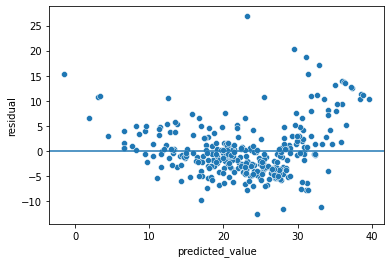

In [ ]:
#calculate residuals
residual = y_boston_train - y_predict_train

#prepare dataframe
#1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

#residual plot
sns.scatterplot(data=df_resid, x='predicted_value', y='residual')
plt.axhline(0)
plt.show()

Asumsi:
1. Linear relationship: OK. Garis horizontal `y=0` cukup merepresentasikan keseluruhtan titik residual
2. Constant Variance: No. Variasinya lebar dari (kanan atas) ke kecil di (bagian tengah) lalu melebar lagi di (kiri atas)
3. Independent residual. Ok. Tidak ada pattern yang mencolok pada residual yang berdekatan.

## Model Evaluation

### Training Error

In this part, we only use **Ridge model** for training and testing data because it performs better than Lasso as found before

In [ ]:
#prepare prediction result on train data
y_predict_train = ridge_best.predict(X_boston_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_boston_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_boston_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_boston_train, y_predict_train)))

RMSE for training data is 4.9709140124939095
MAE for training data is 3.5231969534851517
MAPE for training data is 0.1745584290721267


### Testing Error

In [ ]:
# prepare prediction result on test data
X_boston_test = ftr_boston_test.to_numpy()
y_predict_test = ridge_best.predict(X_boston_test)

# ground truth target
y_boston_test = tgt_boston_test.to_numpy()
y_boston_test = y_boston_test.reshape(len(y_boston_test),)

In [ ]:
boston_house['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_boston_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_boston_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_boston_test, y_predict_test)*100))

RMSE for testing data is 5.446738552406219
MAE for testing data is 3.375222443022143
MAPE for testing data is 18.20805649593079


**Interpretation:**
1. Our prediction model on training data deviates the true `medv` only by 3.52 (MAE) or 17,4% (MAPE), meaning our model is 'OK' and NOT UNDERFITTING. (threshold MAPE <= 30%)
2. Our prediction model on testing data is also 'OK' since it only deviates 18,2% (MAPE) relative to the true `medv`
3. MAPE on testing error > training error, but the difference is not that far, so the model is NOT OVERFITTING
3. In conclusion, our model is **REASONABLE**